<a href="https://colab.research.google.com/github/seton2024/HW_2/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set: [Weather in Szeged 2006-2016](https://www.kaggle.com/datasets/budincsevity/szeged-weather/code?datasetId=634)



1.   [Importing](https://colab.research.google.com/drive/1L9tbc3msHpDchsNZ5Ptbqv4Baex8-ZVm#scrollTo=rsjURYvDL6tx)
2.   [Functions](https://colab.research.google.com/drive/1L9tbc3msHpDchsNZ5Ptbqv4Baex8-ZVm#scrollTo=RbR5PedVNmKV&line=1&uniqifier=1)
3.   [Data preprocessing](https://colab.research.google.com/drive/1L9tbc3msHpDchsNZ5Ptbqv4Baex8-ZVm#scrollTo=XNdlvskGch9K&line=1&uniqifier=1)
4.   [Statistical Analysis](https://colab.research.google.com/drive/1L9tbc3msHpDchsNZ5Ptbqv4Baex8-ZVm#scrollTo=Avmbvb5tH5QF&line=1&uniqifier=1)
5.   [Models](https://colab.research.google.com/drive/1L9tbc3msHpDchsNZ5Ptbqv4Baex8-ZVm#scrollTo=uLSp8nG6cFBF&line=1&uniqifier=1)
6.   [Summary](https://colab.research.google.com/drive/1L9tbc3msHpDchsNZ5Ptbqv4Baex8-ZVm#scrollTo=_xrZRsOu0zg5&line=1&uniqifier=1)








Introduction to the Dataset:

The dataset under consideration contains a comprehensive collection of weather-related observations, providing valuable insights into meteorological conditions.

Key Features of the Dataset:

1. **Formatted Date**: This column records the date and time of each weather observation, providing a chronological order for the dataset.

2. **Summary**: The "Summary" column provides a succinct description of the prevailing weather conditions at the time of the observation. This description can include weather conditions like "Partly Cloudy," "Overcast," "Rain," and more.

3. **Precip Type**: The "Precip Type" column categorizes the type of precipitation that occurred during each observation. This can include values like "rain," "drizzle," or indicate a lack of precipitation with "NaN."

4. **Temperature (C)**: This numerical feature records the temperature in degrees Celsius at the time of the observation. It provides information on how warm or cold the weather was.

5. **Apparent Temperature (C)**: The "Apparent Temperature" represents the perceived temperature by humans.

6. **Humidity**: The "Humidity" column indicates the percentage of moisture present in the air during each observation, offering insights into the level of atmospheric moisture.

7. **Wind Speed (km/h)**: Wind speed is provided in kilometers per hour, offering information on the strength and speed of the wind during the observation.

8. **Wind Bearing (degrees)**: This feature records the wind's direction in degrees, giving an indication of the wind's origin.

9. **Visibility (km)**: "Visibility" is measured in kilometers and indicates how far one can see in the prevailing weather conditions, which can be influenced by factors like fog or precipitation.

10. **Pressure (millibars)**: The "Pressure" feature records atmospheric pressure in millibars, which is a key metric in weather forecasting.

# Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import datetime as dt
from math import sqrt
import seaborn as sns


import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.graphics.tsaplots import plot_acf

from scipy.stats import boxcox, johnsonsu, shapiro, kstest
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Import data from gdrive

In [ ]:
db = pd.read_csv("/content/drive/MyDrive/Predictive analysis/hw1/weatherHistory.csv")
db.head(72)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2006-04-11 19:00:00.000 +0200,Foggy,rain,8.800000,5.294444,0.99,26.5006,339.0,2.6565,0.0,1004.99,Foggy in the evening.
68,2006-04-11 20:00:00.000 +0200,Overcast,rain,8.961111,5.777778,0.93,23.2162,340.0,3.8157,0.0,1004.85,Foggy in the evening.
69,2006-04-11 21:00:00.000 +0200,Overcast,rain,8.200000,4.605556,0.96,25.4219,330.0,4.4919,0.0,1004.96,Foggy in the evening.
70,2006-04-11 22:00:00.000 +0200,Overcast,rain,7.688889,3.722222,0.96,28.1267,339.0,4.4436,0.0,1005.14,Foggy in the evening.


#Functions

In [ ]:
def model_summary(model, x_test, y_test, y_pred, num_folds=5):
    results = {
        'R-squared': [],
        'Adjusted R-squared': [],
        'MAE': [],
        'MSE': [],
        'RMSE': []
    }

    for _ in range(num_folds):

        r_squared = r2_score(y_test, y_pred)

        # Calculate Adjusted R-squared
        n = len(y_test)
        k = x_test.shape[1] + 1  # Number of predictors + intercept
        adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k)

        # Calculate MAE
        mae = mean_absolute_error(y_test, y_pred)

        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)

        # Calculate RMSE
        rmse = sqrt(mse)

        results['R-squared'].append(r_squared)
        results['Adjusted R-squared'].append(adjusted_r_squared)
        results['MAE'].append(mae)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)

    # Calculate the average of each metric
    results_avg = {key: np.mean(value) for key, value in results.items()}

    # Create a summary DataFrame
    summary_df = pd.DataFrame(results)
    summary_df = summary_df.append(results_avg, ignore_index=True)
    summary_df.index = list(range(1, num_folds + 1)) + ['Summary']

    return summary_df

In [ ]:
def transform_and_evaluate_target(df, target_column):

  #List of transformations
    transformations = [
        "No",
        "Log",
        "Square Root",
        "Box-Cox",
        "Johnson",
        "Z-Score",
        "Tukey's Ladder of Powers",
        "Quantile"
    ]

    results = []
 #transformation cycles
    for transformation in transformations:
        transformed_data = df.copy()

        if transformation == "No":
            pass  # No transformation needed
        elif transformation == "Log":
            transformed_data[target_column] = np.log1p(transformed_data[target_column])
        elif transformation == "Square Root":
            transformed_data[target_column] = np.sqrt(transformed_data[target_column])
        elif transformation == "Box-Cox":
            transformed_data[target_column], _ = boxcox(transformed_data[target_column] + 1e-5)
        elif transformation == "Johnson":
            transformed_data[target_column] = johnsonsu.rvs(*johnsonsu.fit(transformed_data[target_column] + 1e-5), size=len(transformed_data))
        elif transformation == "Z-Score":
            transformer = PowerTransformer(method='yeo-johnson', standardize=True)
            transformed_data[target_column] = transformer.fit_transform(transformed_data[[target_column]])
        elif transformation == "Tukey's Ladder of Powers":
            transformer = PowerTransformer(method='yeo-johnson', standardize=False)
            transformed_data[target_column] = transformer.fit_transform(transformed_data[[target_column]])
        elif transformation == "Quantile":
            transformer = QuantileTransformer(output_distribution='normal')
            transformed_data[target_column] = transformer.fit_transform(transformed_data[[target_column]])

        # Perform Kolmogorov-Smirnov test
        ks_stat, ks_pvalue = kstest(transformed_data[target_column], 'norm')

        # Perform Shapiro-Wilk test
        shapiro_stat, shapiro_pvalue = shapiro(transformed_data[target_column])

        results.append({
            "Transformation": transformation,
            "Kolmogorov-Smirnov Test Statistic": ks_stat,
            "Kolmogorov-Smirnov p-value": ks_pvalue,
            "Shapiro-Wilk Test Statistic": shapiro_stat,
            "Shapiro-Wilk p-value": shapiro_pvalue
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    return results_df

# Data Preprocessing

In [ ]:
db.shape

(96453, 12)

In [ ]:
db.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
# after doing some graphs in the HW, it was apperant that the 'Formatted Date'
# collumn was not formated as datetime, hence we will do it now
db['Formatted Date'] = pd.to_datetime(db['Formatted Date'])

Let's look at the values of the columns with object type

In [ ]:
db['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
db['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [ ]:
unique_values_count = db['Daily Summary'].nunique(dropna=False)
print(unique_values_count)

214


I would like to analyze what factors influence apparent temperature so that I will be able to predict it.

I don't plan on grouping the apparent temperature into days, so the daily summary can be dropped as it simply accumulates the information from the column summary into a day

In [ ]:
db = db.drop(['Daily Summary'], axis=1)

In [ ]:
db.shape

(96453, 11)

## Dealing with NaN values

let's see if there are any  columns with NaN values

In [ ]:
db.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [ ]:
#Looking if there is information in the Summary feature about the rain on the percip type = NaN
nan_precip_rows = db[(db['Precip Type'].isna()) & (db['Summary'].isin(['Rain', 'Drizzle', 'Light Rain']))]

print(nan_precip_rows)

Empty DataFrame
Columns: [Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars)]
Index: []


As we can see when the Percip type is NaN that means there are no precipitation, hence we will fill the Nan values with No

In [ ]:
db['Precip Type'] = db['Precip Type'].fillna('No')

In [ ]:
db.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

## Encoding

### Summary

After dealing with NaN values in the "Percip Type," let's encode the categorical data.

In the "summary" column, there are 13 unique values with their combinations. These values are as follows:

1. Partly Cloudy
2. Mostly Cloudy
3. Overcast


*  Foggy
*  Clear


*Wind Speed*
1. Breezy
2. Windy
3. Dangerously Windy


*Humidity*
1. Humid
2. Dry


*Precip Type*
1. Drizzle
2. Light Rain
3. Rain


Withoun the duplicate information the following values will be encoded.
1. Partly Cloudy
2. Mostly Cloudy
3. Overcast

* Foggy
* Clear



In [ ]:
#splitting the summary into a list with values
db['Summary'] = db['Summary'].str.split(' and ')
db

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00+02:00,[Partly Cloudy],rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00+02:00,[Partly Cloudy],rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00+02:00,[Mostly Cloudy],rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00+02:00,[Partly Cloudy],rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00+02:00,[Mostly Cloudy],rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,[Partly Cloudy],rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,2016-09-09 20:00:00+02:00,[Partly Cloudy],rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,2016-09-09 21:00:00+02:00,[Partly Cloudy],rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,2016-09-09 22:00:00+02:00,[Partly Cloudy],rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [ ]:
#copying df for later visualisation
db_sum_list = db.copy()

In [ ]:
#Checking if the listing function worked
def has_two_elements(summary_list):
    return len(summary_list) == 2

rows_with_two_list_objects = db[db['Summary'].apply(has_two_elements)]

print(rows_with_two_list_objects['Summary'])

80       [Breezy, Mostly Cloudy]
81       [Breezy, Mostly Cloudy]
1032     [Breezy, Partly Cloudy]
1306          [Breezy, Overcast]
1311          [Breezy, Overcast]
                  ...           
93685         [Breezy, Overcast]
94146         [Breezy, Overcast]
95612         [Breezy, Overcast]
95940    [Breezy, Mostly Cloudy]
96343         [Breezy, Overcast]
Name: Summary, Length: 1783, dtype: object


As we can see the summary became a list with values

In [ ]:
#encoding of cloudy value from the summary list
def map_cloudy(summary_list):
    if 'Partly Cloudy' in summary_list:
        return 1
    elif 'Mostly Cloudy' in summary_list:
        return 2
    elif 'Overcast' in summary_list:
        return 3
    else:
        return 0

db['cloudy'] = db['Summary'].apply(map_cloudy)
db.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy
0,2006-04-01 00:00:00+02:00,[Partly Cloudy],rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1
1,2006-04-01 01:00:00+02:00,[Partly Cloudy],rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1
2,2006-04-01 02:00:00+02:00,[Mostly Cloudy],rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2
3,2006-04-01 03:00:00+02:00,[Partly Cloudy],rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1
4,2006-04-01 04:00:00+02:00,[Mostly Cloudy],rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2


In [ ]:
#encoding clear
def check_clear(summary_list):
    if 'Clear' in summary_list:
        return 1
    else:
        return 0

db['Clear'] = db['Summary'].apply(check_clear)

In [ ]:
Is_clear = db[db['Clear'] != 0]
Is_clear

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy,Clear
223,2006-04-18 07:00:00+02:00,[Clear],rain,8.688889,8.688889,0.93,1.4329,290.0,5.8443,0.0,1012.96,0,1
309,2006-04-20 21:00:00+02:00,[Clear],rain,12.266667,12.266667,0.99,8.0500,320.0,6.1985,0.0,1015.76,0,1
337,2006-04-22 01:00:00+02:00,[Clear],rain,9.355556,8.633333,0.96,6.4239,321.0,3.3649,0.0,1017.56,0,1
338,2006-04-22 02:00:00+02:00,[Clear],rain,9.861111,9.861111,0.96,3.2361,319.0,4.4597,0.0,1016.16,0,1
357,2006-04-22 21:00:00+02:00,[Clear],rain,12.494444,12.494444,0.91,3.9445,197.0,9.9820,0.0,1015.51,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00+02:00,[Clear],rain,15.594444,15.594444,0.87,3.2844,41.0,15.4399,0.0,1014.52,0,1
96433,2016-09-09 04:00:00+02:00,[Clear],rain,15.011111,15.011111,0.93,3.2039,341.0,15.8263,0.0,1014.37,0,1
96434,2016-09-09 05:00:00+02:00,[Clear],rain,15.016667,15.016667,0.90,2.7048,359.0,14.9569,0.0,1014.55,0,1
96435,2016-09-09 06:00:00+02:00,[Clear],rain,13.872222,13.872222,0.93,4.7495,0.0,15.8263,0.0,1014.66,0,1


In [ ]:
#encoding Foggy
def check_fog(summary_list):
    if 'Foggy' in summary_list:
        return 1
    else:
        return 0

db['Foggy'] = db['Summary'].apply(check_fog)

Is_fog = db[db['Foggy'] != 0]
Is_fog

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy,Clear,Foggy
66,2006-04-11 18:00:00+02:00,[Foggy],rain,10.911111,10.911111,0.86,22.3951,311.0,2.6565,0.0,1004.61,0,0,1
67,2006-04-11 19:00:00+02:00,[Foggy],rain,8.800000,5.294444,0.99,26.5006,339.0,2.6565,0.0,1004.99,0,0,1
72,2006-04-12 00:00:00+02:00,[Foggy],rain,8.200000,5.072222,0.96,20.4470,341.0,3.1073,0.0,1004.80,0,0,1
73,2006-04-12 01:00:00+02:00,[Foggy],rain,8.177778,4.372222,0.93,27.8691,19.0,3.2039,0.0,1004.89,0,0,1
126,2006-04-14 06:00:00+02:00,[Foggy],rain,5.211111,5.211111,0.92,4.7656,178.0,1.2236,0.0,1013.40,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95858,2016-09-14 05:00:00+02:00,[Foggy],rain,13.144444,13.144444,0.99,3.2039,2.0,2.2218,0.0,1015.33,0,0,1
95859,2016-09-14 06:00:00+02:00,[Foggy],rain,13.822222,13.822222,0.94,4.8300,10.0,1.9642,0.0,1015.44,0,0,1
95860,2016-09-14 07:00:00+02:00,[Foggy],rain,13.872222,13.872222,0.94,3.2039,321.0,1.9803,0.0,1015.64,0,0,1
95907,2016-09-16 06:00:00+02:00,[Foggy],rain,14.905556,14.905556,1.00,7.5992,169.0,1.6100,0.0,1016.51,0,0,1


In [ ]:
#Cleaning disk
del Is_fog
del Is_clear
del rows_with_two_list_objects

In [ ]:
db = db.drop(['Summary'], axis=1)
db

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy,Clear,Foggy
0,2006-04-01 00:00:00+02:00,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,0,0
1,2006-04-01 01:00:00+02:00,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,0,0
2,2006-04-01 02:00:00+02:00,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2,0,0
3,2006-04-01 03:00:00+02:00,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,0,0
4,2006-04-01 04:00:00+02:00,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,1,0,0
96449,2016-09-09 20:00:00+02:00,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,1,0,0
96450,2016-09-09 21:00:00+02:00,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,1,0,0
96451,2016-09-09 22:00:00+02:00,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,1,0,0


### Precip Type

In [ ]:
#Encoding Percip_type
db = pd.get_dummies(db, columns=['Precip Type'], prefix='Prec')
db

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy,Clear,Foggy,Prec_No,Prec_rain,Prec_snow
0,2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,0,0,0,1,0
1,2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,0,0,0,1,0
2,2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2,0,0,0,1,0
3,2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,0,0,0,1,0
4,2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,1,0,0,0,1,0
96449,2016-09-09 20:00:00+02:00,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,1,0,0,0,1,0
96450,2016-09-09 21:00:00+02:00,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,1,0,0,0,1,0
96451,2016-09-09 22:00:00+02:00,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,1,0,0,0,1,0


Additionally, I will add another column to calculate the difference between the apparent and real temperature. This will allow me to analyze the factors that affect the change in apparent and real temperature and enable me to predict the difference of the apparent temperature and the real one.

In [ ]:
db['Dif_apper_real_temp'] = db['Apparent Temperature (C)'] - db['Temperature (C)']
db.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy,Clear,Foggy,Prec_No,Prec_rain,Prec_snow,Dif_apper_real_temp
0,2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,0,0,0,1,0,-2.083333
1,2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,0,0,0,1,0,-2.127778
2,2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2,0,0,0,1,0,0.000000
3,2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,0,0,0,1,0,-2.344444
4,2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2,0,0,0,1,0,-1.777778


#Statistical Analysis

##Descriptive statistics

In [ ]:
db.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy,Clear,Foggy,Prec_No,Prec_rain,Prec_snow,Dif_apper_real_temp
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,1.464122,0.112905,0.074513,0.005360,0.883581,0.111059,-1.077650
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,0.992011,0.316478,0.262605,0.073017,0.320729,0.314207,1.678694
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.183333
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.216667
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.811111


From the descriptive analysis, it can be seen that there are 0 values in the "Pressure (millibars)" column, which is not normal. Therefore, all of the 0 values will be replaced with the mean value of the column.

In [ ]:
#Filling 0 pressure with mean
mean_pressure = db[db['Pressure (millibars)'] != 0]['Pressure (millibars)'].mean()

db['Pressure (millibars)'] = db['Pressure (millibars)'].replace(0, mean_pressure)

zero_pressure_rows = db[db['Pressure (millibars)'] == 0]
print(zero_pressure_rows)

Empty DataFrame
Columns: [Formatted Date, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars), cloudy, Clear, Foggy, Prec_No, Prec_rain, Prec_snow, Dif_apper_real_temp]
Index: []


In [ ]:
del zero_pressure_rows

In [ ]:
db.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),cloudy,Clear,Foggy,Prec_No,Prec_rain,Prec_snow,Dif_apper_real_temp
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1016.814140,1.464122,0.112905,0.074513,0.005360,0.883581,0.111059,-1.077650
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,7.726246,0.992011,0.316478,0.262605,0.073017,0.320729,0.314207,1.678694
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,973.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.183333
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1012.200000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.216667
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.670000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.811111


Temperature: The average temperature is about 11.9°C, with a deviation from the average of 9.5°C. It exhibits a slight negative skewness as the mean is less than the mode. The skewness is to the left.

Apparent temperature: The average apparent temperature is 1°C lower than the real temperature, at 10.8°C, with a standard deviation of 10.7°C, which is 1°C higher. It also has slight negative skewness and is skewed to the left.

Dif_apper_real_temp: The average difference between apparent and real temperatures is -1°C, with a standard deviation of 1.7°C. It has negative skewness and is skewed to the left.

Humidity: The average humidity percentage is 73%, with a standard deviation of about 20%. Humidity exhibits slight negative skewness and is skewed to the left.

Wind Speed (km/h): The average wind speed is approximately 10.8 km/h, with a standard deviation of about 7 km/h. Wind speed has positive skewness and leans to the right.

Visibility: The average visibility is 10.3 km, with a standard deviation of 4.2 km. It has a slight skewness to the right, indicating positive skewness.

Pressure (millibars): The average pressure is approximately 1017 mb, with a standard deviation of about 7.7 mb. It exhibits positive skewness and is skewed to the right.

Wind Bearing (degrees): The average wind bearing is approximately 187.5°, with a standard deviation of about 107.3°. It has significant positive skewness and is skewed to the right.

Cloudy: The days presented mostly have a high level of cloudiness, with an average of 1.5 and a standard deviation of 0.99. It is skewed to the right, indicating a positive skew.

Clear: The average number of clear days is 0.11, with a standard deviation of 0.3. It exhibits slight positive skewness and is skewed to the right.

Foggy: The average number of foggy days is 0.07, with a standard deviation of 0.3. It has the slightest positive skewness and is skewed to the right.

Prec_No: The probability of a day having no precipitation in the database is 0.005, with a standard deviation of 0.07. It exhibits the slightest positive skewness and is skewed to the right.

Prec_rain: The probability of a rainy day in the database is 0.88, with a standard deviation of 0.3. It has negative skewness and is skewed to the left.

Prec_snow: The probability of a snowy day in the database is 0.11, with a standard deviation of 0.31. It exhibits positive skewness and is skewed to the right.

As we can see from the analysis above Loud Cover consists of the value 0, hence I will be droping it

In [ ]:
db = db.drop(['Loud Cover'], axis=1)

##Data Visualisation

In [ ]:
columns = db_sum_list.columns
print(columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)'],
      dtype='object')


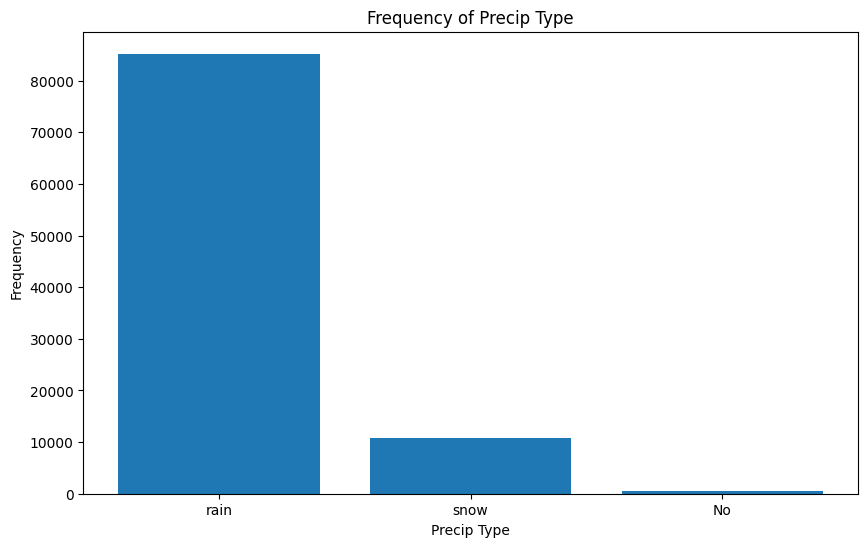

In [ ]:
#plotting a frequency diagramm dor the Precip Type values
precip_counts = db_sum_list['Precip Type'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(precip_counts.index, precip_counts.values)
plt.title('Frequency of Precip Type')
plt.xlabel('Precip Type')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#exploding the list values to plot  unique values of Summary list
exploded_values = db_sum_list['Summary'].explode()

unique_values = exploded_values.unique()

Sum_fr = pd.DataFrame({'names': unique_values, 'frequencies': [0] * len(unique_values)})

for name in unique_values:
    # Count the occurrences of 'name' in the 'Summary' column and update the frequencies
    count = (exploded_values == name).sum()
    Sum_fr.loc[Sum_fr['names'] == name, 'frequencies'] = count

print(Sum_fr)

                names  frequencies
0       Partly Cloudy        32290
1       Mostly Cloudy        28699
2            Overcast        17177
3               Foggy         7187
4              Breezy         1520
5               Clear        10890
6               Humid           64
7               Windy          160
8                 Dry          136
9   Dangerously Windy            1
10         Light Rain           63
11            Drizzle           39
12               Rain           10


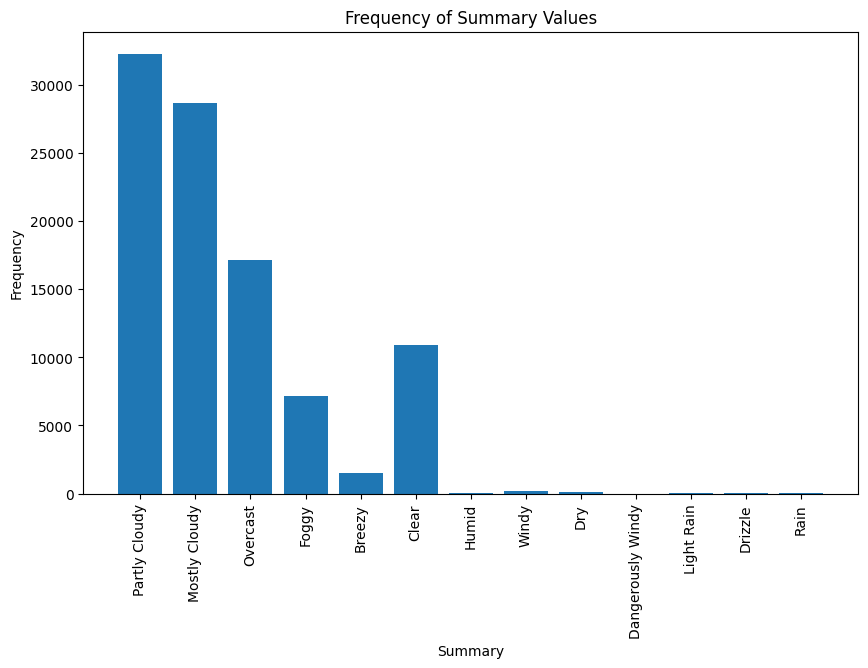

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Sum_fr['names'], Sum_fr['frequencies'])


plt.title('Frequency of Summary Values')
plt.xlabel('Summary')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

As we can see, the categorical data is not evenly distributed. We mostly have two leaders with significant drops:

1. Precipitation Type: Rain
2. Summary: Partly and Mostly Cloudy

<Figure size 3000x1000 with 0 Axes>

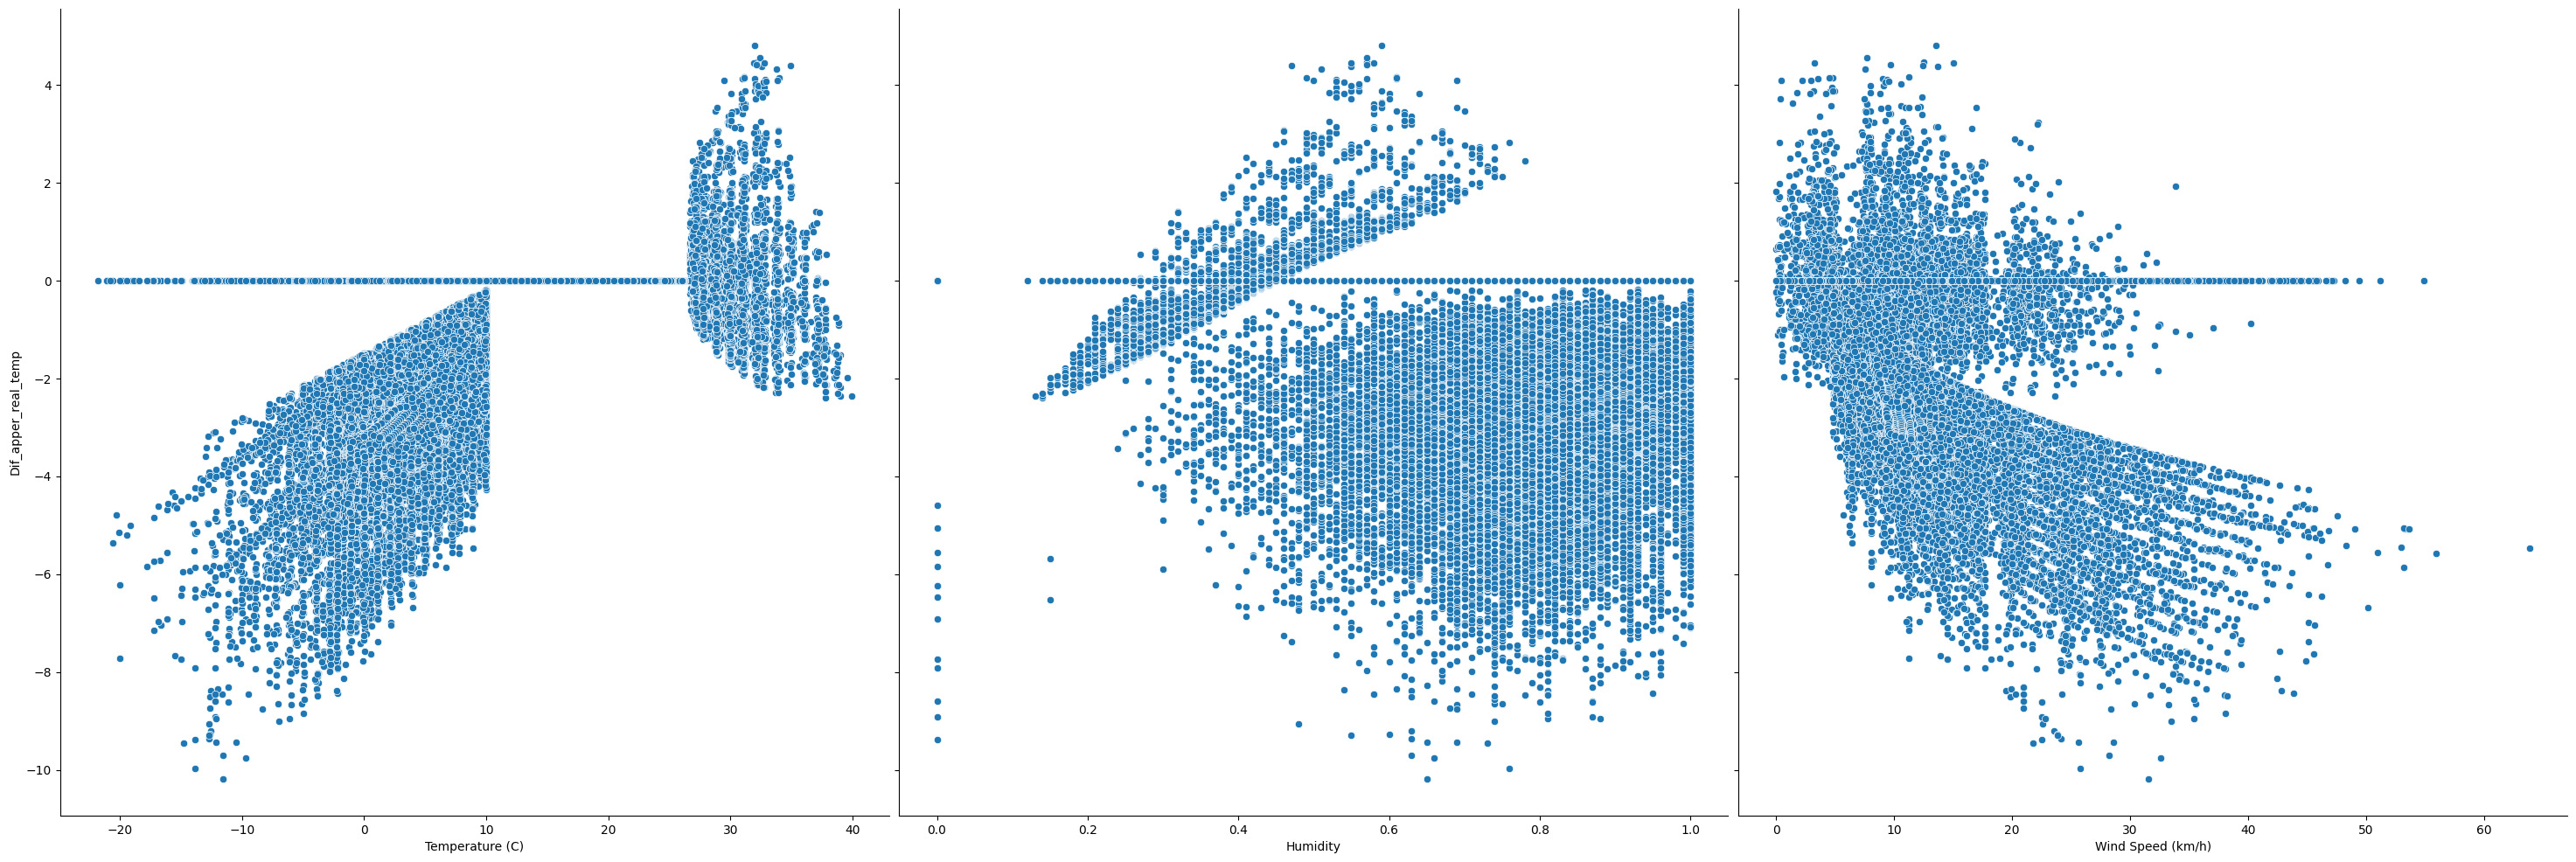

In [ ]:
#looking at the features with the target feature to find 1D regression
plt.figure(figsize=(30, 10))

# Define columns to be plotted
X_cols = ["Temperature (C)", "Humidity", "Wind Speed (km/h)"]
y_cols = ["Dif_apper_real_temp"]

# Create a pairplot with the specified variables
sns.pairplot(db, x_vars=X_cols, y_vars=y_cols, height=10)

plt.show()

<Figure size 3000x1000 with 0 Axes>

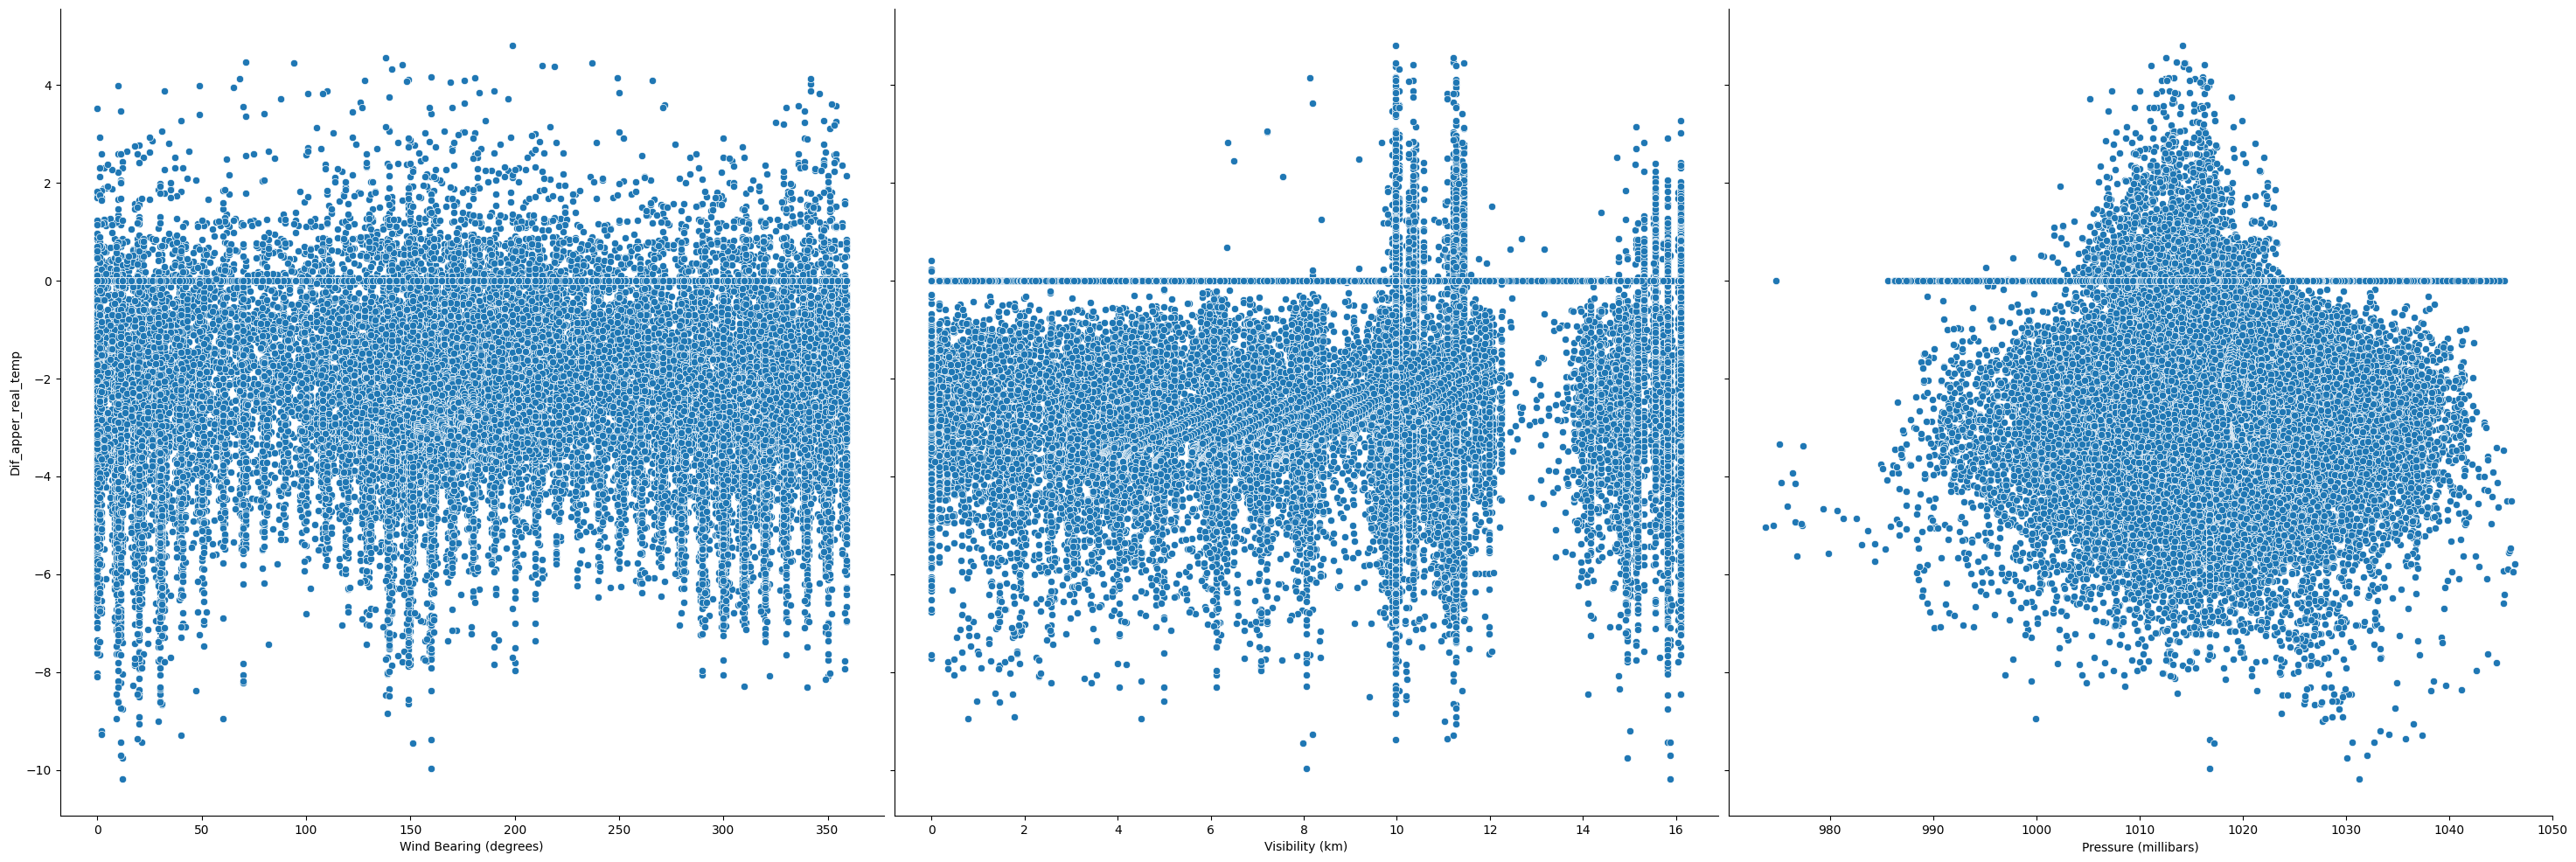

In [ ]:
plt.figure(figsize=(30, 10))

# Define columns to be plotted
X_cols = ["Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]
y_cols = ["Dif_apper_real_temp"]

# Create a pairplot with the specified variables
sns.pairplot(db, x_vars=X_cols, y_vars=y_cols, height=10)

plt.show()

There is no apparent linear regression between the presented values; hence, we will proceed with multivariable regression

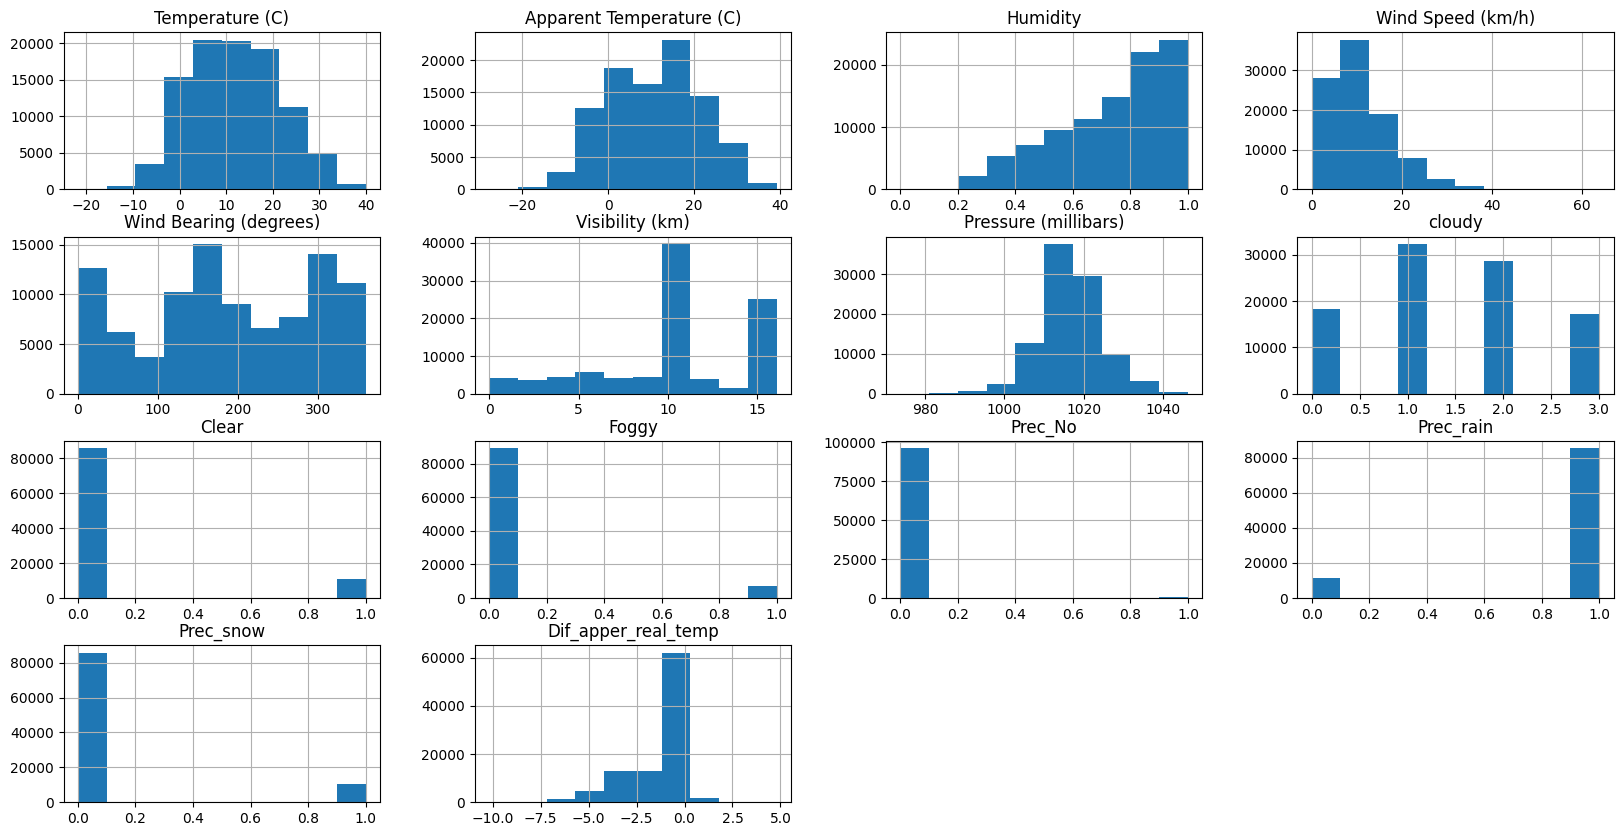

In [ ]:
#looking at the frequency diagramm
db.hist(linewidth=1.2, figsize=(20,10));

As we can see, there is some skewness in humidity and wind speed. Let's attempt to correct it

In [ ]:
del precip_counts, exploded_values, unique_values, Sum_fr, X_cols, y_cols

##Skewness

In [ ]:
#finding the best way to fix the skewnwss of the humidity
results_df = transform_and_evaluate_target(db, 'Humidity')
print(results_df)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


             Transformation  Kolmogorov-Smirnov Test Statistic  \
0                        No                           0.599017   
1                       Log                           0.585693   
2               Square Root                           0.689851   
3                   Box-Cox                           0.499996   
4                   Johnson                           0.578543   
5                   Z-Score                           0.075410   
6  Tukey's Ladder of Powers                           0.702943   
7                  Quantile                           0.031627   

   Kolmogorov-Smirnov p-value  Shapiro-Wilk Test Statistic  \
0                0.000000e+00                     0.927954   
1                0.000000e+00                     0.907630   
2                0.000000e+00                     0.899611   
3                0.000000e+00                     0.953236   
4                0.000000e+00                     0.840557   
5                0.000000e+00    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#finding the best way to fix the skewnwss of the Wind speed
results_df = transform_and_evaluate_target(db, 'Wind Speed (km/h)')
print(results_df)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


             Transformation  Kolmogorov-Smirnov Test Statistic  \
0                        No                           0.944505   
1                       Log                           0.851628   
2               Square Root                           0.895799   
3                   Box-Cox                           0.855796   
4                   Johnson                           0.931332   
5                   Z-Score                           0.039720   
6  Tukey's Ladder of Powers                           0.900409   
7                  Quantile                           0.013625   

   Kolmogorov-Smirnov p-value  Shapiro-Wilk Test Statistic  \
0                0.000000e+00                     0.931244   
1                0.000000e+00                     0.958913   
2                0.000000e+00                     0.991567   
3                0.000000e+00                     0.989576   
4                0.000000e+00                     0.916033   
5               1.176772e-132    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


for both features the Tukey's Ladder of Powers transformation has the best score, hence will be used to transform

In [ ]:
#to check Tukey's Ladder of Powers and Quantile transformations on Humidity
db2 = db.copy()
db3 = db.copy()

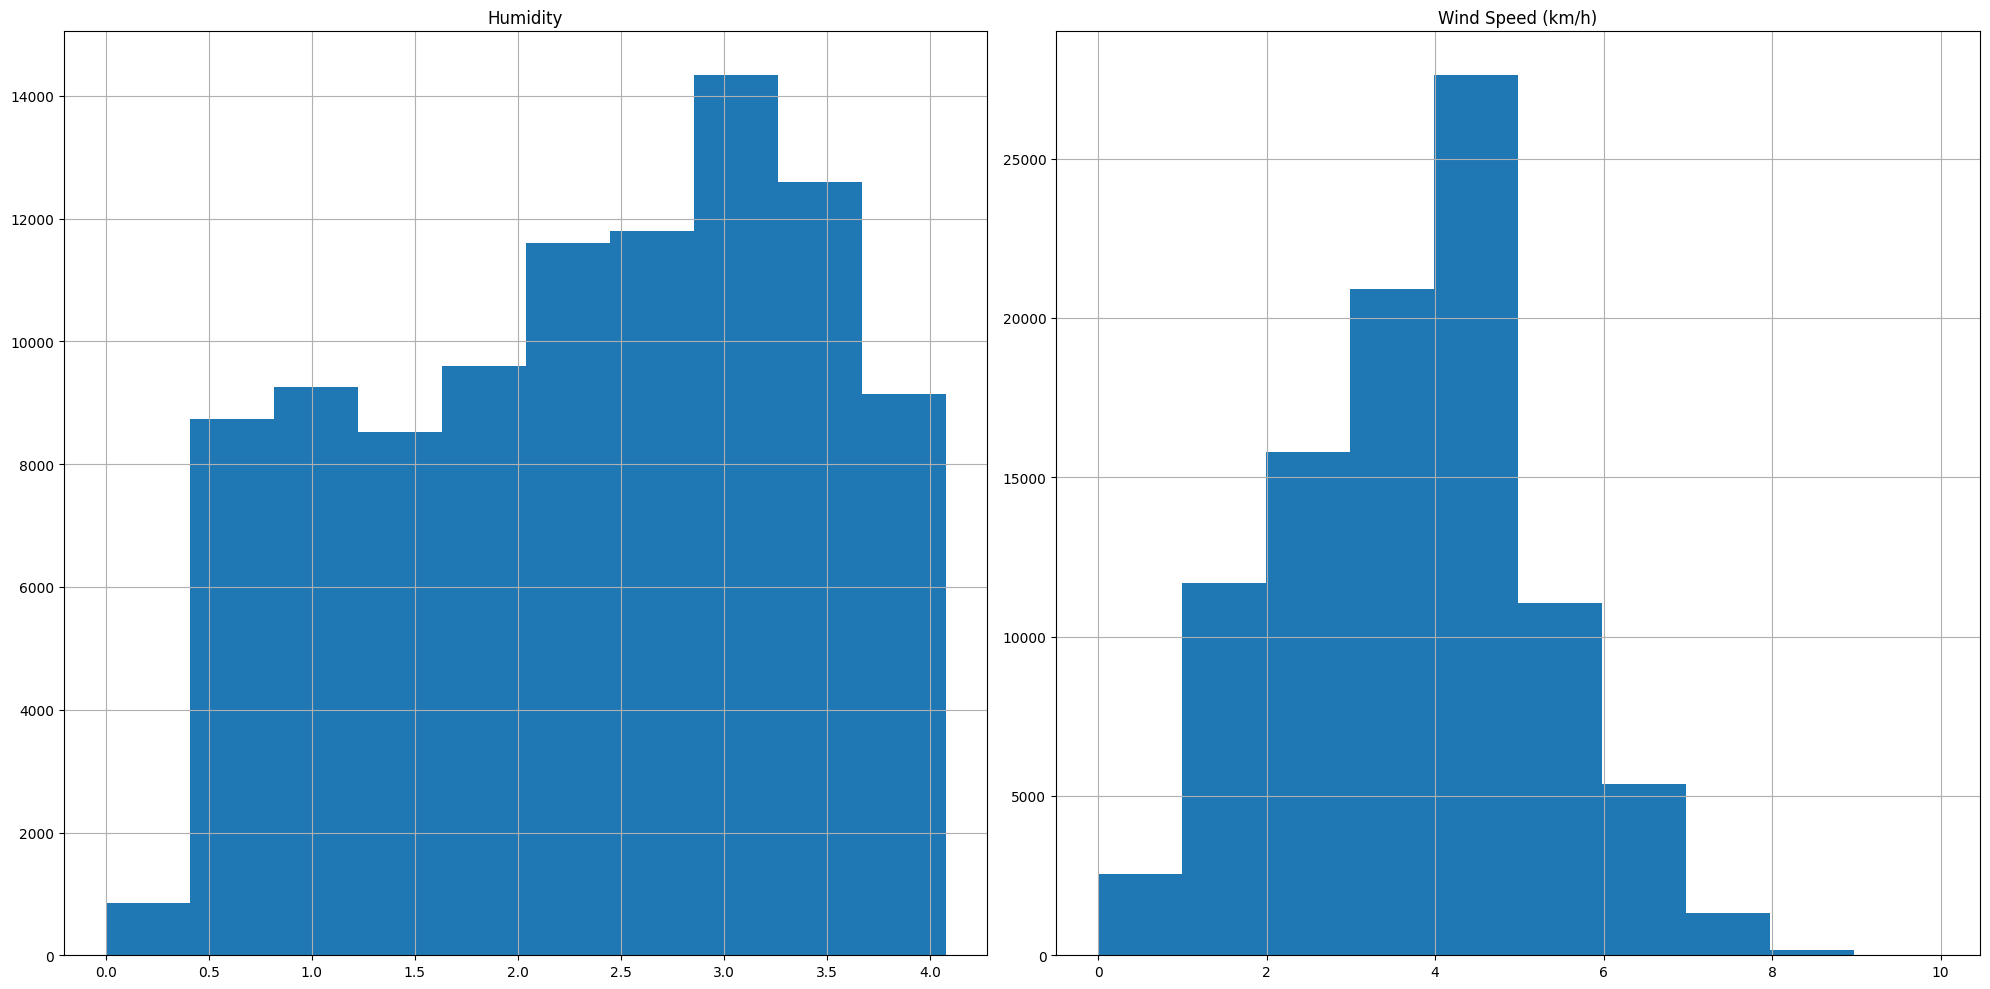

In [ ]:
##Tukey's Ladder of Powers both
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

Humid = 'Humidity'
db2[Humid] = transformer.fit_transform(db2[[Humid]])

Speed = 'Wind Speed (km/h)'
db2[Speed] = transformer.fit_transform(db2[[Speed]])

columns_to_plot = ['Humidity', 'Wind Speed (km/h)']
db2[columns_to_plot].hist(linewidth=1.2, figsize=(20, 10))
plt.tight_layout()
plt.show()

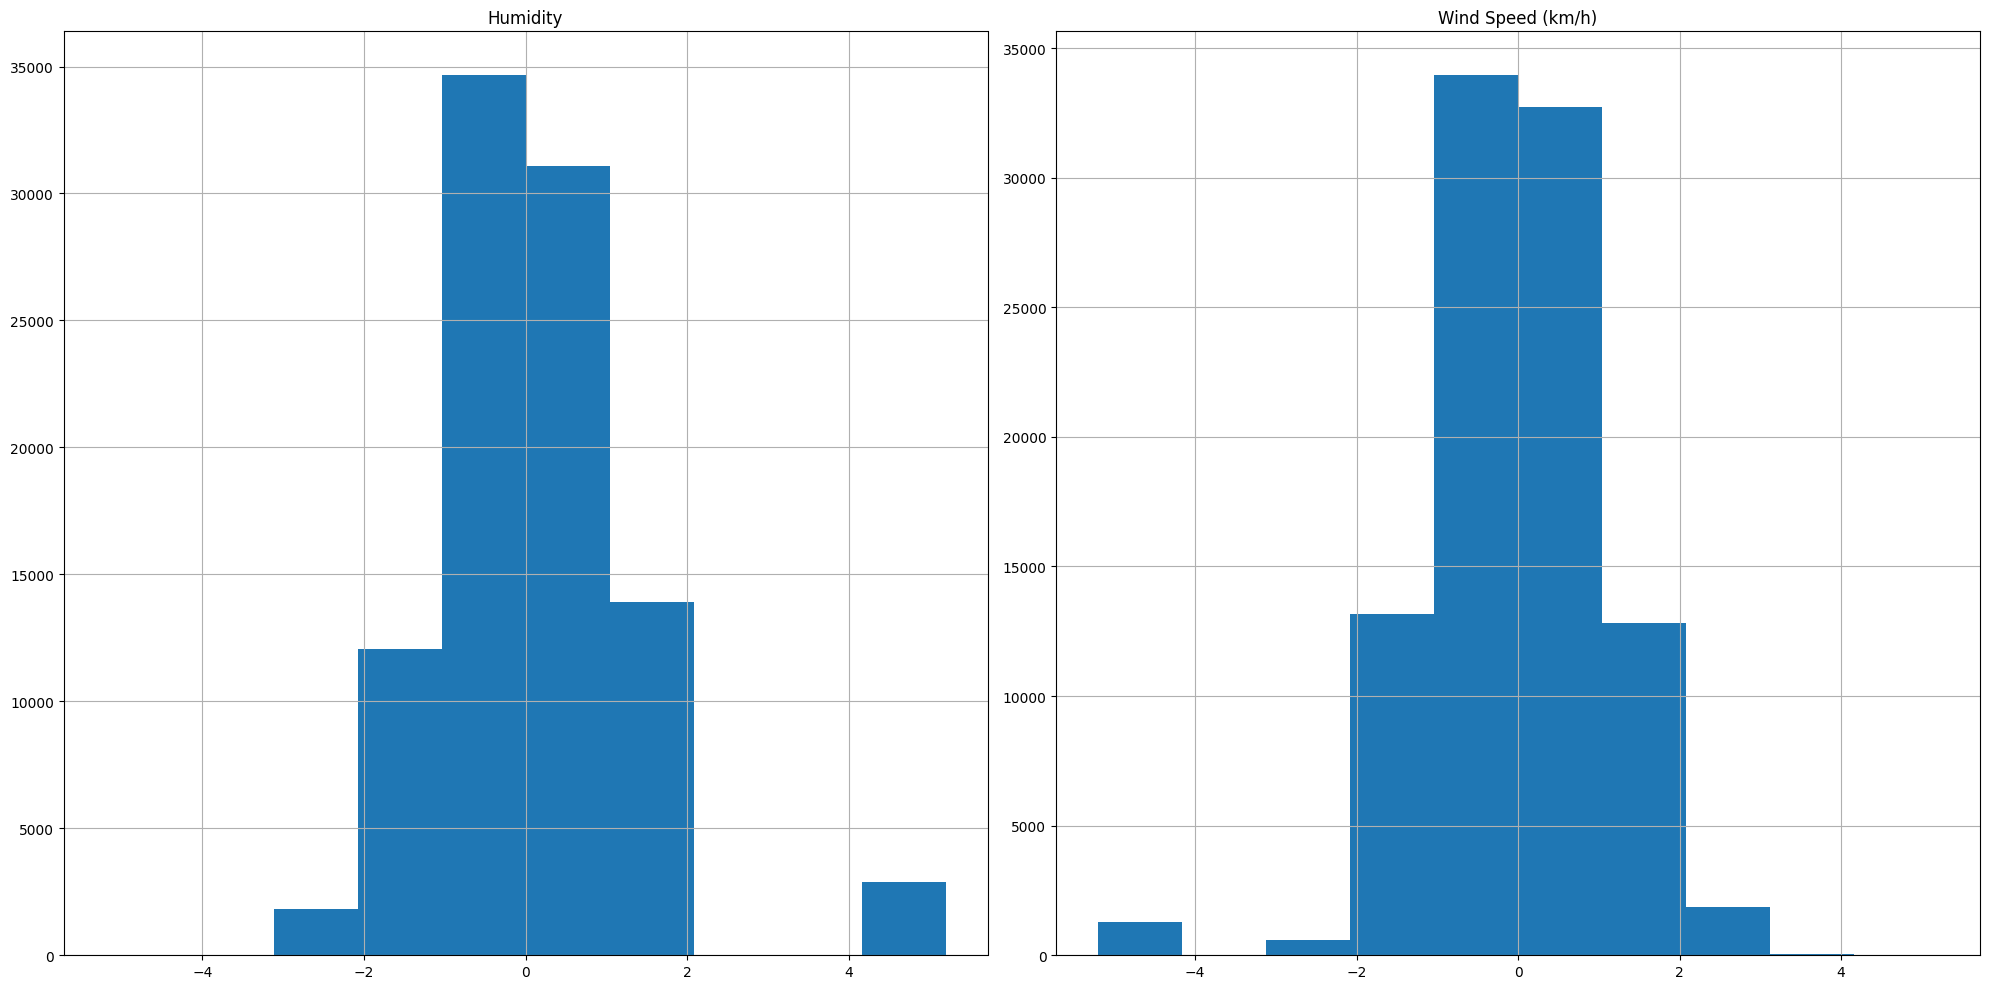

In [ ]:
##Quantile both
transformer2 = QuantileTransformer(output_distribution='normal')

db3[Humid] = transformer2.fit_transform(db3[[Humid]])

db3[Speed] = transformer2.fit_transform(db3[[Speed]])


db3[columns_to_plot].hist(linewidth=1.2, figsize=(20, 10))
plt.tight_layout()
plt.show()

After visual analysis, Tukey's Ladder of Powers works best on wind speed, and quantile transformation works best on humidity.

In [ ]:
db4=db.copy()

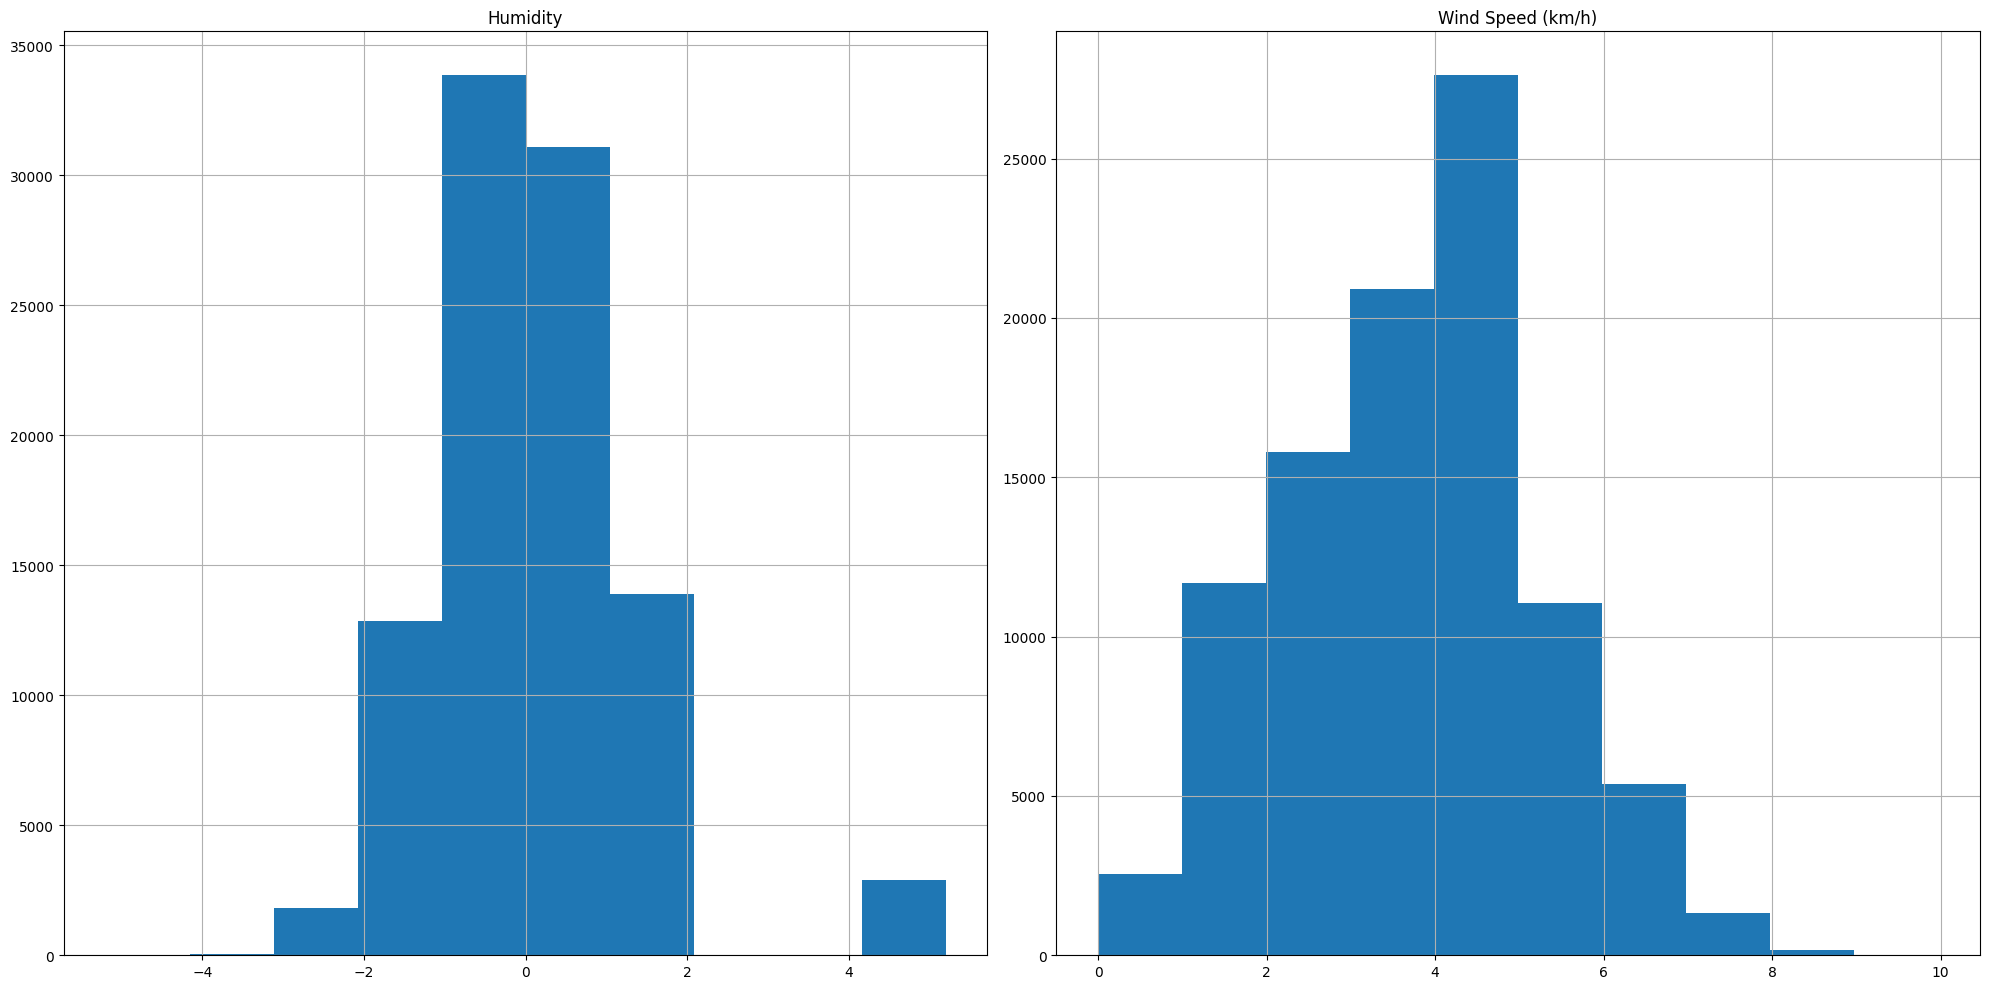

In [ ]:
transformer1 = PowerTransformer(method='yeo-johnson', standardize=False)

db4[Speed] = transformer.fit_transform(db4[[Speed]])

transformer2 = QuantileTransformer(output_distribution='normal')

db4[Humid] = transformer2.fit_transform(db4[[Humid]])


db4[columns_to_plot].hist(linewidth=1.2, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [ ]:
del db2, db3, results_df, transformer, Humid, Speed, columns_to_plot, transformer2

##Correlation

In [ ]:
columns = db4.columns
print(columns)

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'cloudy', 'Clear', 'Foggy',
       'Prec_No', 'Prec_rain', 'Prec_snow', 'Dif_apper_real_temp'],
      dtype='object')


<ipython-input-51-ecb0cdc998cc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db4.corr(), annot=True)


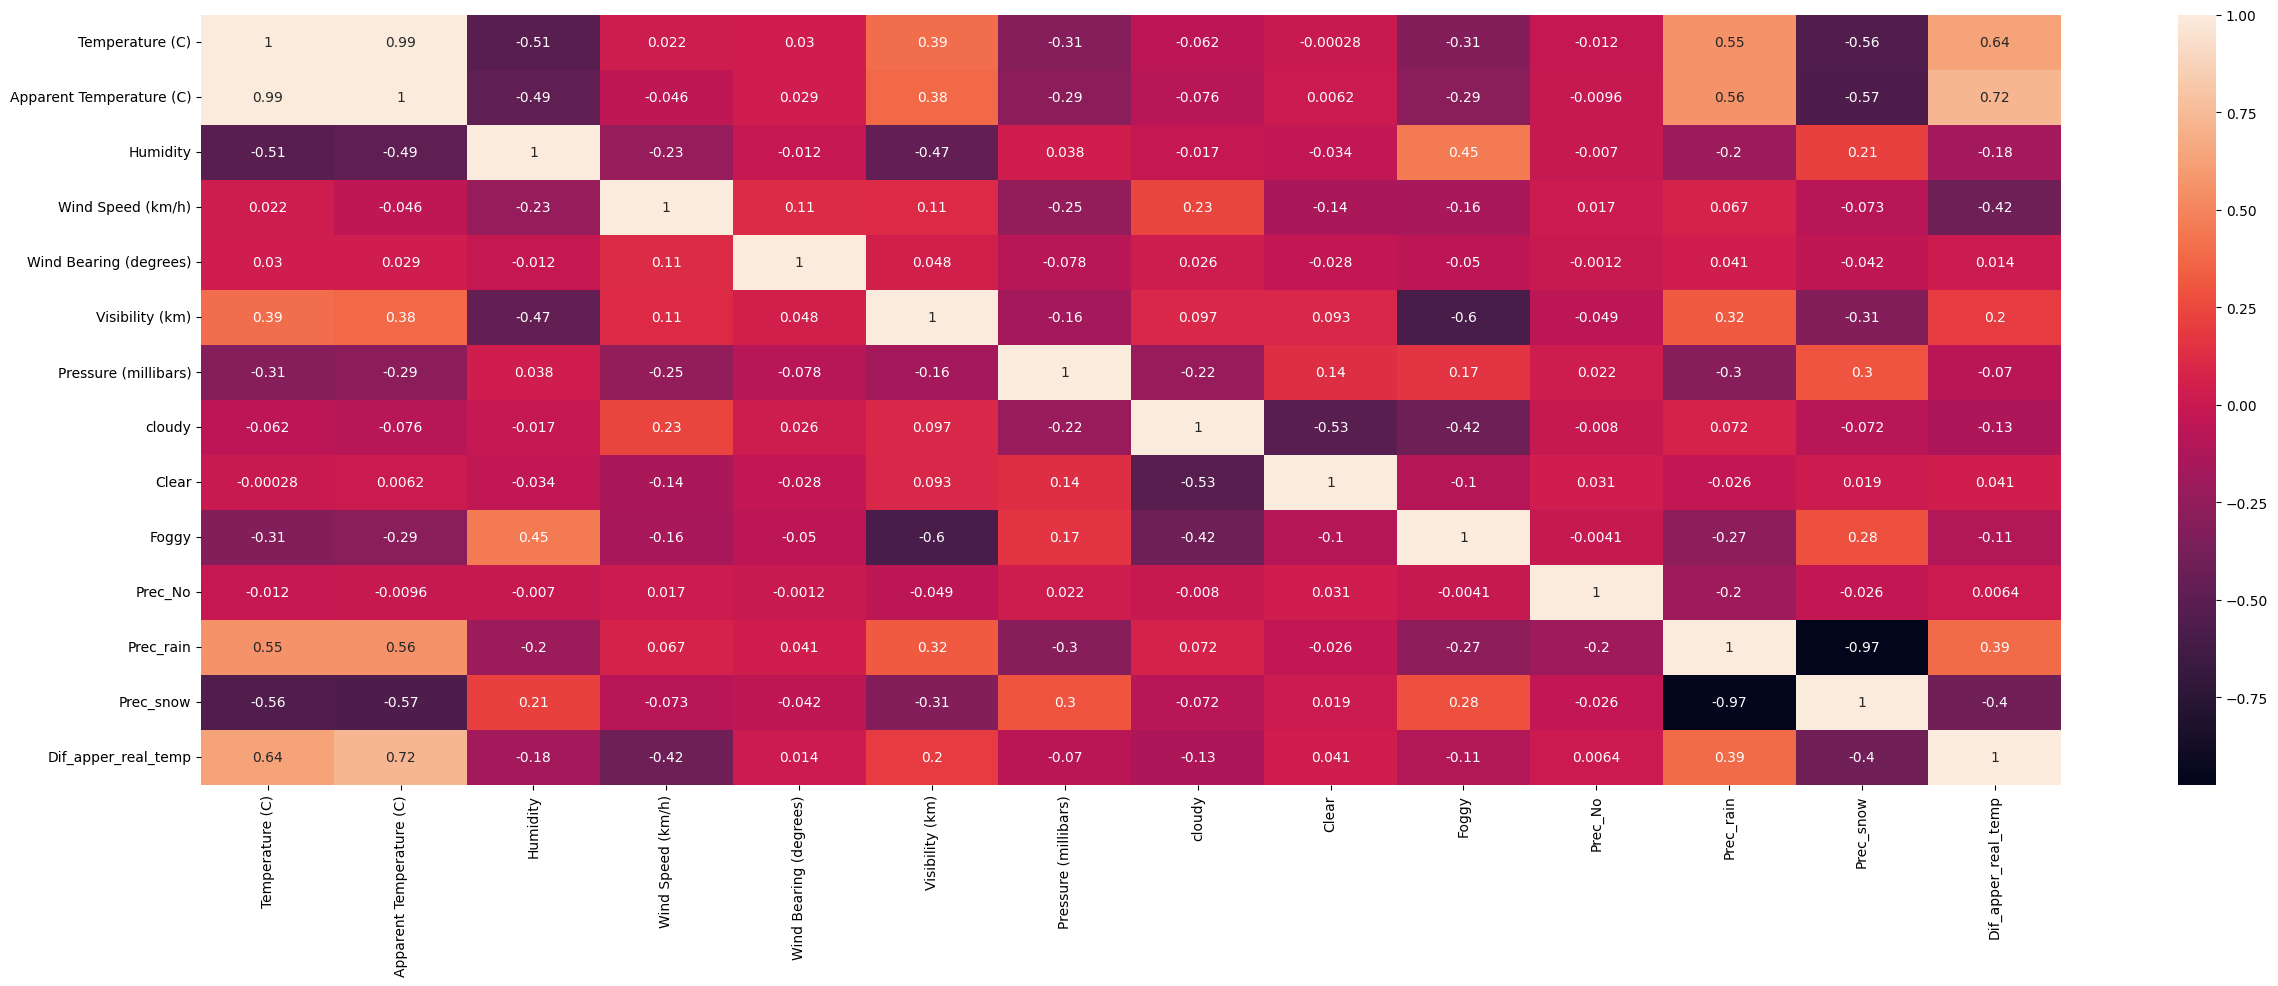

In [ ]:

plt.figure(figsize=(30, 10))

sns.heatmap(db4.corr(), annot=True)

plt.show()

For the model of analising the difference in apperant temperature we will be using the variables with absolute values more than 0,15



Here are the important conclusions for correlation matrix:

1. **Positive Strong Correlations:**
   - The presence of a `coffee_bar` and `video_store` is strongly correlated (approximately 0.544). Stores with a coffee bar are likely to have a video store.
   - `salad_bar` and `prepared_food` have an extremely strong positive correlation (approximately 1.000). These two features are nearly identical in this dataset, indicating a very high level of similarity or redundancy.
<br>
<br>
2. **Moderate Positive Correlations:**
   - `coffee_bar` and `video_store` are positively correlated with each other (approximately 0.54), indicating a moderate positive relationship.
   - `coffee_bar` and `video_store` also exhibit a moderate positive correlation with `florist` (approximately 0.55 to 0.62), indicating a moderate positive relationship.
<br>
<br>
3. **Store Square Footage and Other Variables:**
   - There is a very weak positive correlation (approximately 0.33) between `store_sqft` and both `salad_bar` and `prepared_food`. Conversely, there is a weak negative correlation (approximately -0.20) between `salad_bar` and `coffee_bar`.

These conclusions highlight the relationships between specific features in the dataset. For instance, the strong positive correlation between `salad_bar` and `prepared_food` indicates redundancy or similarity, potentially allowing for feature reduction.

##Multicollinearity

Temperature and apparent temperature have a 0.99 correlation, and 'Prec_rain' and 'Prec_snow' have a -0.97 correlation. Let's check for multicollinearity using VIF.

In [ ]:
independent_variables = db4[['Temperature (C)', 'Apparent Temperature (C)']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif_data)

                   Variable        VIF
0           Temperature (C)  58.817167
1  Apparent Temperature (C)  58.817167


The VIF is significantly greater than 5, indicating multicollinearity. Therefore, apparent temperature will not be used in the models.

In [ ]:
independent_variables1 = db4[['Prec_rain', 'Prec_snow']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables1.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables1.values, i) for i in range(independent_variables1.shape[1])]

print(vif_data)

    Variable       VIF
0  Prec_rain  0.002722
1  Prec_snow  0.020164


The VIF is less than 5, indicating that we don't have multicollinearity.

In [ ]:
del columns, vif_data

#Models

In [ ]:
X=db4.copy()
X = X.drop(['Formatted Date', 'Apparent Temperature (C)', 'Wind Bearing (degrees)','Pressure (millibars)', 'cloudy', 'Clear', 'Foggy', 'Prec_No', 'Dif_apper_real_temp'], axis=1)
y = db4['Dif_apper_real_temp']

##OSL

In [ ]:
X1= sm.add_constant(X)
results_OSL = sm.OLS(y, X1).fit()
print(results_OSL.summary())

                             OLS Regression Results                            
Dep. Variable:     Dif_apper_real_temp   R-squared:                       0.602
Model:                             OLS   Adj. R-squared:                  0.602
Method:                  Least Squares   F-statistic:                 2.428e+04
Date:                 Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                         21:17:42   Log-Likelihood:            -1.4243e+05
No. Observations:                96453   AIC:                         2.849e+05
Df Residuals:                    96446   BIC:                         2.849e+05
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0882

As we can see, there is an insignificant variable (P>|t| of Visibility (km) > 0.05). I'll drop it from the X. Additionally, it is recommended to create a model with a constant value of 0. I'll create one. However, for the heteroscedasticity test, a model with a constant value will be needed. So, the test will be conducted without visibility data but with the constant.

In [ ]:
#The code didn't work there was a constan=-0.0902
X1=X1.drop(['Visibility (km)'], axis=1)
#results_OSL = sm.OLS(y, X1).fit(hasconst=False)
#print(results_OSL.summary())

In [ ]:
X=X.drop(['Visibility (km)'], axis=1)
X2=X.copy()
X2 = np.column_stack((X2, np.zeros(X2.shape[0])))
results_OSL2 = sm.OLS(y, X2).fit()
print(results_OSL2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Dif_apper_real_temp   R-squared (uncentered):                   0.718
Model:                             OLS   Adj. R-squared (uncentered):              0.718
Method:                  Least Squares   F-statistic:                          4.909e+04
Date:                 Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                         21:17:42   Log-Likelihood:                     -1.4243e+05
No. Observations:                96453   AIC:                                  2.849e+05
Df Residuals:                    96448   BIC:                                  2.849e+05
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


**y=0.1106*x1+0.0915*x2-0.4844*x3-0.5292x4-1.0170x5**
<br>
<br>
x1- Temperature (C)
<br>
x2- Humidity
<br>
x3- Wind Speed (km/h)
<br>
x4- Prec_rain
<br>
x5- Prec_snow
<br>
<br>
1. The **R-squared and Adj. R-square** value are 0.718, indicating that approximately 71.8% of the variance in the target variable is explained by the features. Hence the model can be concidered accurete and lacking of insignificant features

2. The **F-statistic** is high and the **Prob (F-statistic)** is 0 so the model is statistically significant.

3. **Covariance Type: nonrobust** indicates that there is no potential heteroscedasticity or non-constant variance in the data.

9. The **p-value of Omnibus** test and **Jarque-Bera** testa are 0, so the residuals may not be normally distributed.

10. The residuals have a slight positive **skew**.

11. The residuals have moderate tails **(Kurtosis)**.

12. Durbin-Watson: 0.446 indicates slight negative autocorrelation.

To test for heteroscedasticity regression model, I will use the Breusch-Pagan test and the White test.

In [ ]:
results_OSL3 = sm.OLS(y, X1).fit()

# Calculate residuals
residuals = results_OSL3.resid

# Perform the Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, X1)
bp_p_value = bp_test[1]

# Perform the White test for heteroscedasticity
white_test = sms.het_white(residuals, X1)
white_p_value = white_test[1]

#print(results_OSL3.summary())

print(f"Breusch-Pagan Test p-value: {bp_p_value}")
print(f"White Test p-value: {white_p_value}")


Breusch-Pagan Test p-value: 0.0
White Test p-value: 0.0


The  values p values<0,05 hence there is no heteroscedasticity

In [ ]:
del results_OSL2, results_OSL, X1, X2, bp_test, residuals, bp_p_value, white_test, white_p_value

## Linear regression

In [ ]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

summary_lr = model_summary(lr, X_test, y_test, y_pred_lr, num_folds=5)
summary_lr

<ipython-input-4-2644d38e50cf>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(results_avg, ignore_index=True)


,R-squared,Adjusted R-squared,MAE,MSE,RMSE
1,0.60645,0.606348,0.839301,1.117845,1.057282
2,0.60645,0.606348,0.839301,1.117845,1.057282
3,0.60645,0.606348,0.839301,1.117845,1.057282
4,0.60645,0.606348,0.839301,1.117845,1.057282
5,0.60645,0.606348,0.839301,1.117845,1.057282
Summary,0.60645,0.606348,0.839301,1.117845,1.057282


In [ ]:
#displayind intercept and constants
const_lr=lr.intercept_
coeff_lr=lr.coef_
print(const_lr)
print(coeff_lr)

-0.08645357274841814
[ 0.11061819  0.08846736 -0.48404078 -0.44427066 -0.91553775]


##Ridge

In [ ]:
HP_r = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ridge = Ridge()
ridge_gr = GridSearchCV(ridge, HP_r, scoring='neg_mean_squared_error', cv=5)
ridge_gr.fit(X_train, y_train)

print("Best value for lambda: ", ridge_gr.best_params_)

Best value for lambda:  {'alpha': 0.01}


In [ ]:
y_pred_r = ridge_gr.predict(X_test)

In [ ]:
summary_r = model_summary(ridge_gr, X_test, y_test, y_pred_r, num_folds=5)
summary_r

<ipython-input-4-2644d38e50cf>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(results_avg, ignore_index=True)


,R-squared,Adjusted R-squared,MAE,MSE,RMSE
1,0.60645,0.606348,0.839301,1.117845,1.057282
2,0.60645,0.606348,0.839301,1.117845,1.057282
3,0.60645,0.606348,0.839301,1.117845,1.057282
4,0.60645,0.606348,0.839301,1.117845,1.057282
5,0.60645,0.606348,0.839301,1.117845,1.057282
Summary,0.60645,0.606348,0.839301,1.117845,1.057282


##Lasso

In [ ]:
lasso = Lasso()
lasso_gr = GridSearchCV(lasso, HP_r , scoring='neg_mean_squared_error', cv=5)
lasso_gr.fit(X_train,y_train)

print("Best value for lambda : ",lasso_gr.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+04, tolerance: 1.733e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+04, tolerance: 1.732e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.653e+04, tolerance: 1.736e

Best value for lambda :  {'alpha': 1e-15}


In [ ]:
y_pred_l=lasso_gr.predict(X_test)

In [ ]:
summary_l = model_summary(lasso_gr, X_test, y_test, y_pred_l, num_folds=5)
summary_l

<ipython-input-4-2644d38e50cf>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(results_avg, ignore_index=True)


,R-squared,Adjusted R-squared,MAE,MSE,RMSE
1,0.60645,0.606348,0.839301,1.117845,1.057282
2,0.60645,0.606348,0.839301,1.117845,1.057282
3,0.60645,0.606348,0.839301,1.117845,1.057282
4,0.60645,0.606348,0.839301,1.117845,1.057282
5,0.60645,0.606348,0.839301,1.117845,1.057282
Summary,0.60645,0.606348,0.839301,1.117845,1.057282


##Random forest

In [ ]:
rf = RandomForestRegressor(random_state = 42)

HP_tr = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],}

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

y_array = y.to_numpy().reshape(-1, 1)

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y_array)

In [ ]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
rf_rnd = RandomizedSearchCV(rf, HP_tr, scoring='neg_mean_squared_error' , cv=5)

rf_rnd.fit(X_train_sc, y_train_sc)
rf_rnd.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'min_samples_split': 16, 'min_samples_leaf': 5, 'max_depth': 15}

In [ ]:
y_pred_rf = rf_rnd.predict(X_test_sc)

In [ ]:
summary_rf = model_summary(rf_rnd, X_test_sc, y_test_sc, y_pred_rf, num_folds=5)
summary_rf

<ipython-input-4-2644d38e50cf>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(results_avg, ignore_index=True)


,R-squared,Adjusted R-squared,MAE,MSE,RMSE
1,0.999428,0.999428,0.005474,0.000576,0.02401
2,0.999428,0.999428,0.005474,0.000576,0.02401
3,0.999428,0.999428,0.005474,0.000576,0.02401
4,0.999428,0.999428,0.005474,0.000576,0.02401
5,0.999428,0.999428,0.005474,0.000576,0.02401
Summary,0.999428,0.999428,0.005474,0.000576,0.02401


##Decision tree

In [ ]:
dt = DecisionTreeRegressor(random_state=43)

dt_rnd = RandomizedSearchCV(dt, HP_tr, scoring='neg_mean_squared_error' , cv=5)

dt_rnd.fit(X_train_sc, y_train_sc)
dt_rnd.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 15}

In [ ]:
y_pred_dt = dt_rnd.predict(X_test_sc)

In [ ]:
summary_dt = model_summary(dt_rnd, X_test_sc, y_test_sc, y_pred_dt, num_folds=5)
summary_dt

<ipython-input-4-2644d38e50cf>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(results_avg, ignore_index=True)


,R-squared,Adjusted R-squared,MAE,MSE,RMSE
1,0.998883,0.998883,0.010093,0.001125,0.033547
2,0.998883,0.998883,0.010093,0.001125,0.033547
3,0.998883,0.998883,0.010093,0.001125,0.033547
4,0.998883,0.998883,0.010093,0.001125,0.033547
5,0.998883,0.998883,0.010093,0.001125,0.033547
Summary,0.998883,0.998883,0.010093,0.001125,0.033547



##SVR Regressor

In [ ]:
SVR = SVR(kernel = 'rbf')
SVR.fit(X_train_sc, y_train_sc)
y_pred_SVR = SVR.predict(X_test_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
summary_SVR = model_summary(SVR, X_test_sc, y_test_sc, y_pred_SVR, num_folds=5)
summary_SVR

<ipython-input-4-2644d38e50cf>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(results_avg, ignore_index=True)


,R-squared,Adjusted R-squared,MAE,MSE,RMSE
1,0.960583,0.960573,0.126863,0.039731,0.199326
2,0.960583,0.960573,0.126863,0.039731,0.199326
3,0.960583,0.960573,0.126863,0.039731,0.199326
4,0.960583,0.960573,0.126863,0.039731,0.199326
5,0.960583,0.960573,0.126863,0.039731,0.199326
Summary,0.960583,0.960573,0.126863,0.039731,0.199326


## Summary

In [ ]:
summaries = {
    'Ridge': summary_r.loc['Summary'],
    'Lasso': summary_l.loc['Summary'],
    'Random forest': summary_rf.loc['Summary'],
    'Decision tree': summary_dt.loc['Summary'],
    'SVR': summary_SVR.loc['Summary']
}

# Create a summary DataFrame
summary_df = pd.DataFrame(summaries)
summary_df = summary_df.T  # Transpose for a more suitable format

# Define functions to highlight cells
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

def highlight_closest_to_1(s):
    closest_to_1 = abs(s - 1).idxmin()
    return ['background-color: lightgreen' if idx == closest_to_1 else '' for idx in s.index]

# Apply the highlight functions to the MAE, MSE, and RMSE columns
summary_df.style.apply(highlight_min, subset=['MAE', 'MSE', 'RMSE']) \
               .apply(highlight_closest_to_1, subset=['R-squared', 'Adjusted R-squared'])


,R-squared,Adjusted R-squared,MAE,MSE,RMSE
Ridge,0.606450,0.606348,0.839301,1.117845,1.057282
Lasso,0.606450,0.606348,0.839301,1.117845,1.057282
Random forest,0.999428,0.999428,0.005474,0.000576,0.024010
Decision tree,0.998883,0.998883,0.010093,0.001125,0.033547
SVR,0.960583,0.960573,0.126863,0.039731,0.199326


Summary of Model Performance Metrics:

The table presents a summary of performance metrics for various predictive models used on a dataset.

1. **The Random Forest** model demonstrates exceptional predictive performance with an extremely high R-squared value of 0.999, suggesting that it explains nearly all the variance in the data. The very low MAE, MSE, and RMSE values indicate that this model's predictions are highly accurate.

2. **The Decision Tree** model performs remarkably well, with a high R-squared value of 0.998, indicating its ability to explain a significant portion of the data's variance. The low MAE, MSE, and RMSE values reflect accurate predictions.

3. **SVR** shows strong performance with an R-squared value of 0.960, indicating a good ability to explain the data's variance. The MAE, MSE, and RMSE values, while higher than the ensemble methods, still represent a relatively accurate predictive model.

4. **Ridge and Lasso Regression** models exhibit similar performance with moderate R-squared values of 0.606, indicating that these models explain approximately 60.6% of the variance in the data. The relatively low RMSE suggests a reasonable level of accuracy in their predictions.
